In [26]:
import warnings
warnings.filterwarnings("ignore")

In [241]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [28]:
df = pd.DataFrame(pd.read_csv("ICUpatients.csv"))

In [29]:
df.isna().any()

Patientid                     False
ICU Type                      False
Origin Level of Care          False
Age                           False
Sex                           False
LOS                           False
previous_LOS                  False
previous_ICU_stays            False
Type                          False
Charlson_index                False
weekend                       False
disch_night                   False
cvc_status                    False
SIRS_48_hour                  False
MV_24_hour                    False
Initial_SOFA_Liver            False
Initial_SOFA_Coagulation      False
Initial_SOFA_Nerv             False
Initial_SOFA_Renal            False
Initial_SOFA_Respiratory      False
Initial_SOFA_Cardio           False
Discharge_SOFA_Liver          False
Discharge_SOFA_Coagulation    False
Discharge_SOFA_Nerv           False
Discharge_SOFA_Renal          False
Discharge_SOFA_Respiratory    False
Discharge_SOFA_Cardio         False
Max_SOFA_Liver              

In [30]:
df.shape

(16059, 51)

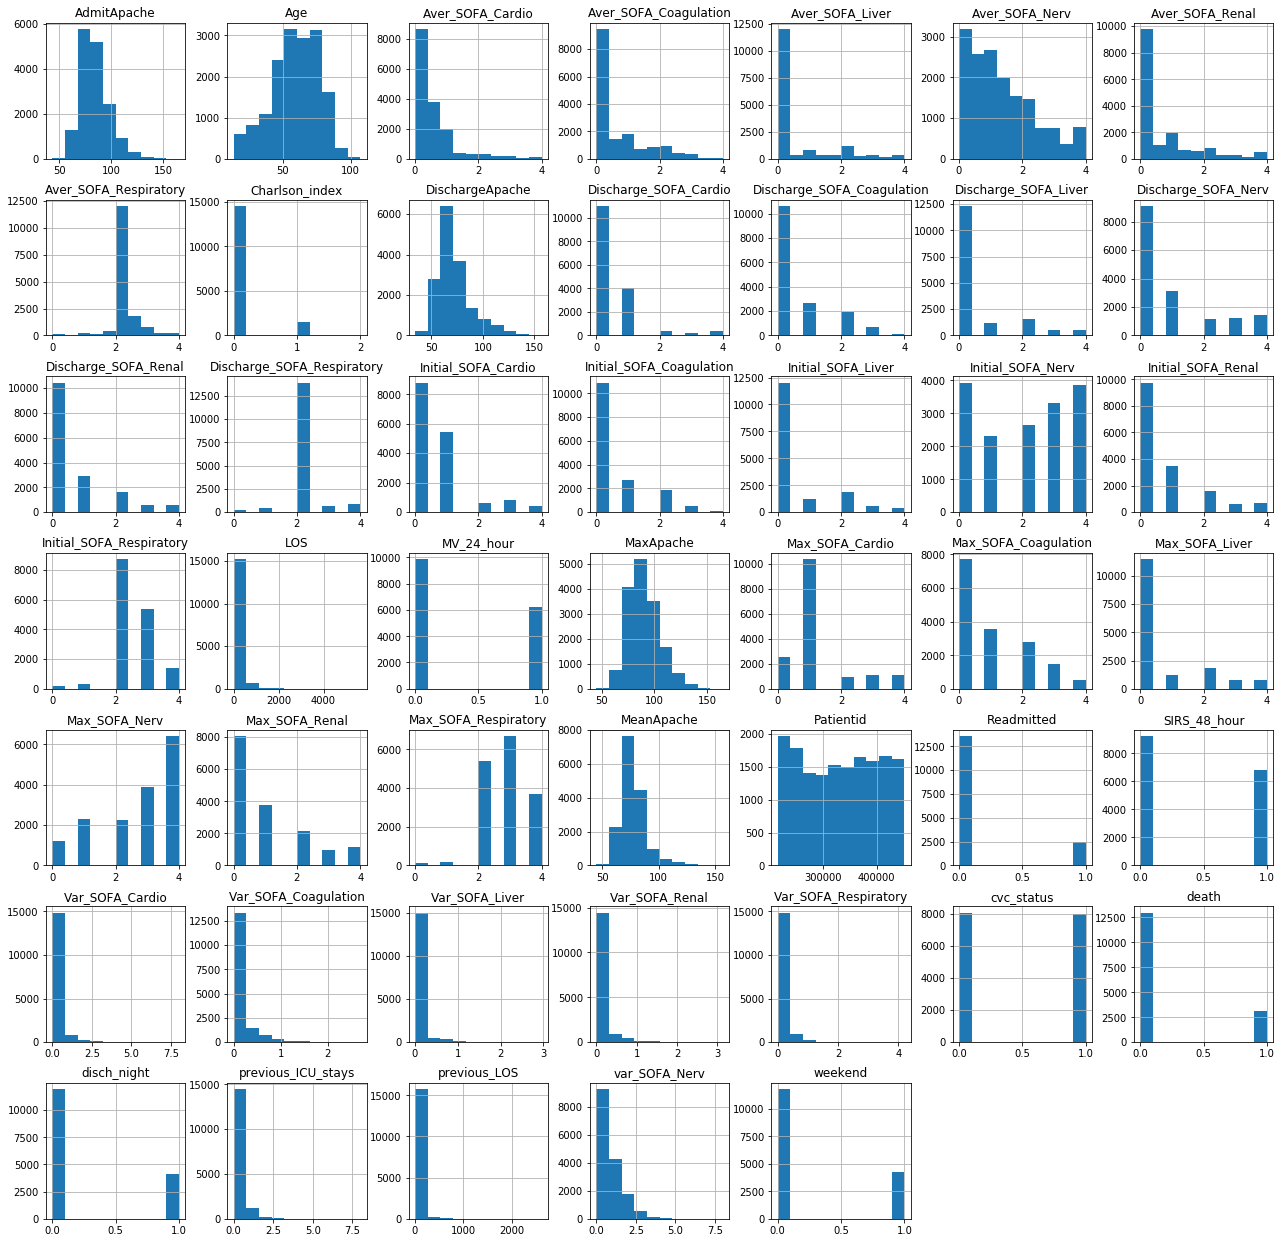

In [31]:
#histogram
df.hist(figsize = (22,22))
pyplot.show()

In [32]:
value_count_r = df['Readmitted'].value_counts()
value_count_d = df['death'].value_counts()

print(value_count_r ,  "\n\n" , value_count_d)

0    13584
1     2475
Name: Readmitted, dtype: int64 

 0    12976
1     3083
Name: death, dtype: int64


In [33]:
data_types = [df[i].dtype for i in df.columns]
print ("Data types in the dataset:" ,list(set(data_types)))

Data types in the dataset: [dtype('int64'), dtype('O'), dtype('float64')]


In [34]:
df_float64 = df[df.select_dtypes(["float64"]).columns.tolist()]
df_int64 =  df[df.select_dtypes(["int64"]).columns.tolist()]
df_object =  df[df.select_dtypes(["object"]).columns.tolist()]

df.select_dtypes(["object"]).columns.tolist()

['ICU Type', 'Origin Level of Care', 'Sex', 'Type']

In [35]:
df["Sex"] = df["Sex"].replace(["M"],0)
df["Sex"] = df["Sex"].replace(["F"],1)

In [36]:
df = df.drop(["Patientid"], axis=1)
encoder = OneHotEncoder()
df_object_array = df_object.to_numpy()
encodedColumns = encoder.fit_transform(df_object_array).toarray()
df_object_encoded = pd.DataFrame(encodedColumns)


df_ = df_float64.join(df_int64)
df_ = df_.reset_index().drop(["index"],axis=1)
dff = df_object_encoded.join(df_)

In [39]:
x = dff.iloc[:,:-2]
y = dff.iloc[:,-2:]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [43]:
y_train_readmitted = y_train.iloc[:,0:1]
y_train_death = y_train.iloc[:,1:]

y_test_readmitted = y_test.iloc[:,0:1]
y_test_death = y_test.iloc[:,1:]

In [247]:
estimator = DecisionTreeClassifier()
selector = RFECV(estimator, step=1, cv=5,scoring="recall")
selector = selector.fit(x_train, y_train_readmitted)
s_s = selector.support_
s_r = selector.ranking_

In [248]:
s_s

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True])

In [249]:
s_r

array([1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1])

In [259]:
x_train_r = x_train
x_test_r = x_test
columns = x_train.columns
drop_columns = []

for i in range(len(s_s)):
    if s_s[i] == False:
        column = columns[i]
        
        x_train_r = x_train_r.drop([column],axis=1)
        x_test_r = x_test_r.drop([column],axis=1)

x_train_r.shape

(12847, 54)

In [112]:
estimator =  DecisionTreeClassifier()
selector = RFECV(estimator, step=1, cv=5,scoring="recall")
selector = selector.fit(x_train, y_train_death)
s_ss = selector.support_
s_rr = selector.ranking_

In [113]:
s_ss

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True,  True])

In [114]:
s_rr

array([27,  7, 17, 11, 14, 18, 24, 31, 12, 35, 22, 23, 34,  2,  1,  1,  1,
        1,  1,  1,  1,  1, 16,  1,  1,  1,  1,  1,  1,  1,  1,  6, 25, 10,
        1, 29,  3, 21, 26,  4,  5,  9, 30,  8,  1, 19,  1,  1, 13,  1, 32,
       36, 33, 15, 28, 20,  1,  1,  1])

In [260]:
x_train_d = x_train
x_test_d = x_test
columns = x_train.columns
drop_columns = []

for i in range(len(s_ss)):
    if s_ss[i] == False:
        column = columns[i]
        
        x_train_d = x_train_d.drop([column],axis=1)
        x_test_d = x_test_d.drop([column],axis=1)

x_train_d.shape

(12847, 24)

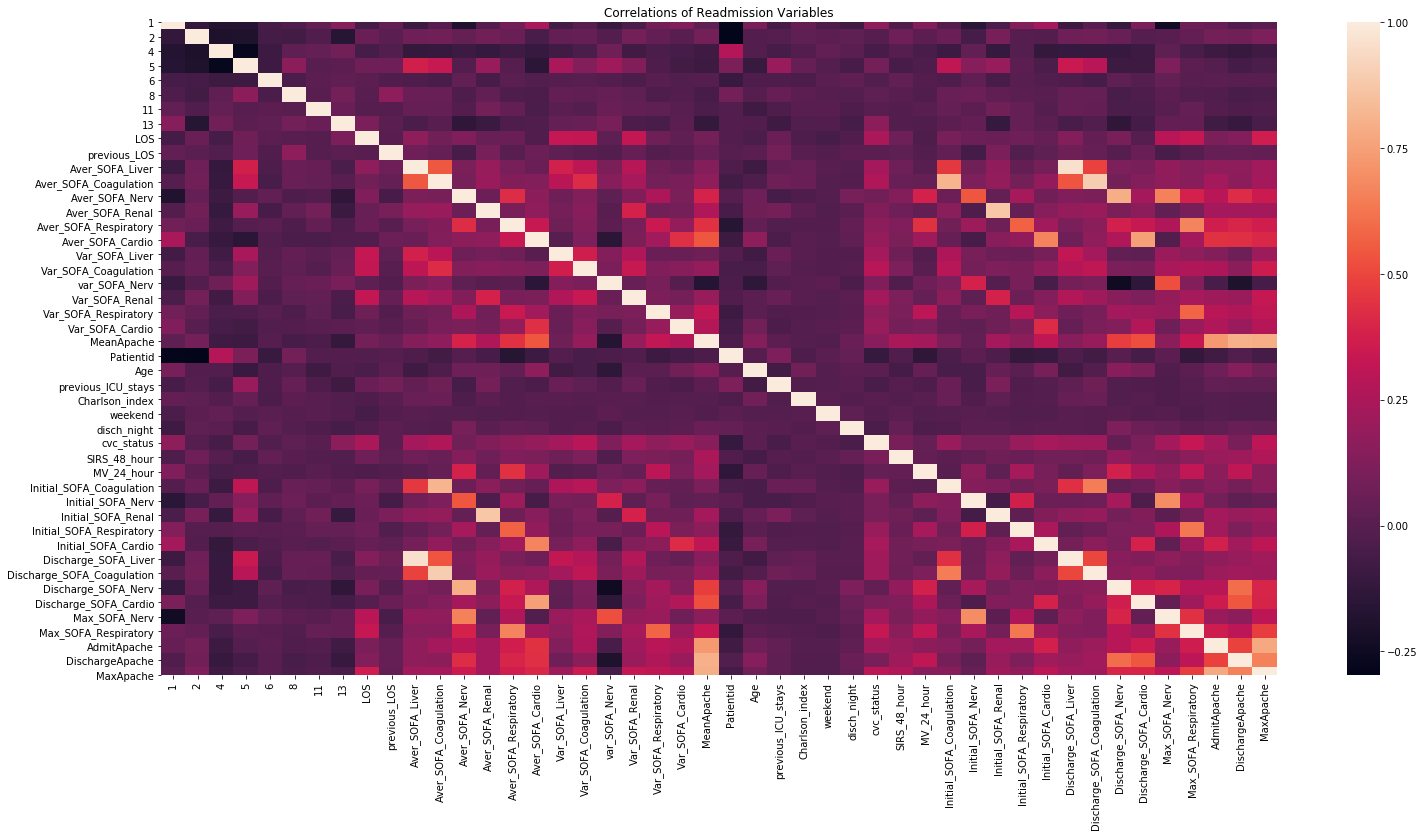

In [163]:
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(x_train_r.corr(), ax=ax)
plt.title('Correlations of Readmission Variables')
plt.show()

In [164]:
x_train_r.corr()

,1,2,4,5,6,8,11,13,LOS,previous_LOS,...,Initial_SOFA_Cardio,Discharge_SOFA_Liver,Discharge_SOFA_Coagulation,Discharge_SOFA_Nerv,Discharge_SOFA_Cardio,Max_SOFA_Nerv,Max_SOFA_Respiratory,AdmitApache,DischargeApache,MaxApache
1,1.000000,-0.119810,-0.172837,-0.168167,-0.056009,-0.029414,0.030306,0.139533,-0.061823,0.030726,...,0.229596,-0.084123,0.001193,-0.113435,0.107673,-0.239345,0.061146,0.047664,-0.025233,0.004077
2,-0.119810,1.000000,-0.195754,-0.190465,-0.063435,-0.065263,-0.024884,-0.164108,0.053713,0.008673,...,-0.015792,0.071754,0.074221,0.048150,-0.010467,0.002622,0.036671,0.087334,0.077971,0.116646
4,-0.172837,-0.195754,1.000000,-0.274762,-0.091511,0.025434,0.037612,0.077930,-0.054218,-0.020861,...,-0.115015,-0.111424,-0.106783,-0.106958,-0.086393,0.022187,-0.047165,-0.090545,-0.105643,-0.082494
5,-0.168167,-0.190465,-0.274762,1.000000,-0.089038,0.157650,-0.002938,0.016289,0.063875,0.071017,...,-0.042160,0.341553,0.292795,-0.084435,-0.090399,0.117326,0.013120,-0.012988,-0.058923,-0.040928
6,-0.056009,-0.063435,-0.091511,-0.089038,1.000000,-0.039841,0.015380,0.023617,0.013863,-0.027104,...,-0.022130,-0.028637,-0.054507,0.022042,-0.011751,0.037929,0.003308,0.010961,0.001876,-0.000658
8,-0.029414,-0.065263,0.025434,0.157650,-0.039841,1.000000,0.003368,0.087685,0.000729,0.168188,...,-0.001040,0.046044,0.039716,-0.043984,-0.029213,0.014269,-0.020608,-0.026949,-0.044185,-0.040409
11,0.030306,-0.024884,0.037612,-0.002938,0.015380,0.003368,1.000000,0.054573,-0.004464,-0.007641,...,-0.011201,0.047098,0.036565,-0.038510,-0.040847,0.002801,0.039769,-0.016227,-0.029955,-0.025814
13,0.139533,-0.164108,0.077930,0.016289,0.023617,0.087685,0.054573,1.000000,0.103737,0.010244,...,0.008072,-0.047483,-0.020073,-0.130542,-0.063643,0.036626,0.034730,-0.078279,-0.105122,-0.044252
LOS,-0.061823,0.053713,-0.054218,0.063875,0.013863,0.000729,-0.004464,0.103737,1.000000,0.004944,...,0.046479,0.133588,0.033244,0.102299,-0.003993,0.290896,0.332204,0.113502,0.131102,0.364257
previous_LOS,0.030726,0.008673,-0.020861,0.071017,-0.027104,0.168188,-0.007641,0.010244,0.004944,1.000000,...,0.021503,0.066013,0.047468,-0.006989,0.054159,-0.047744,-0.004941,0.043292,0.047601,0.035705


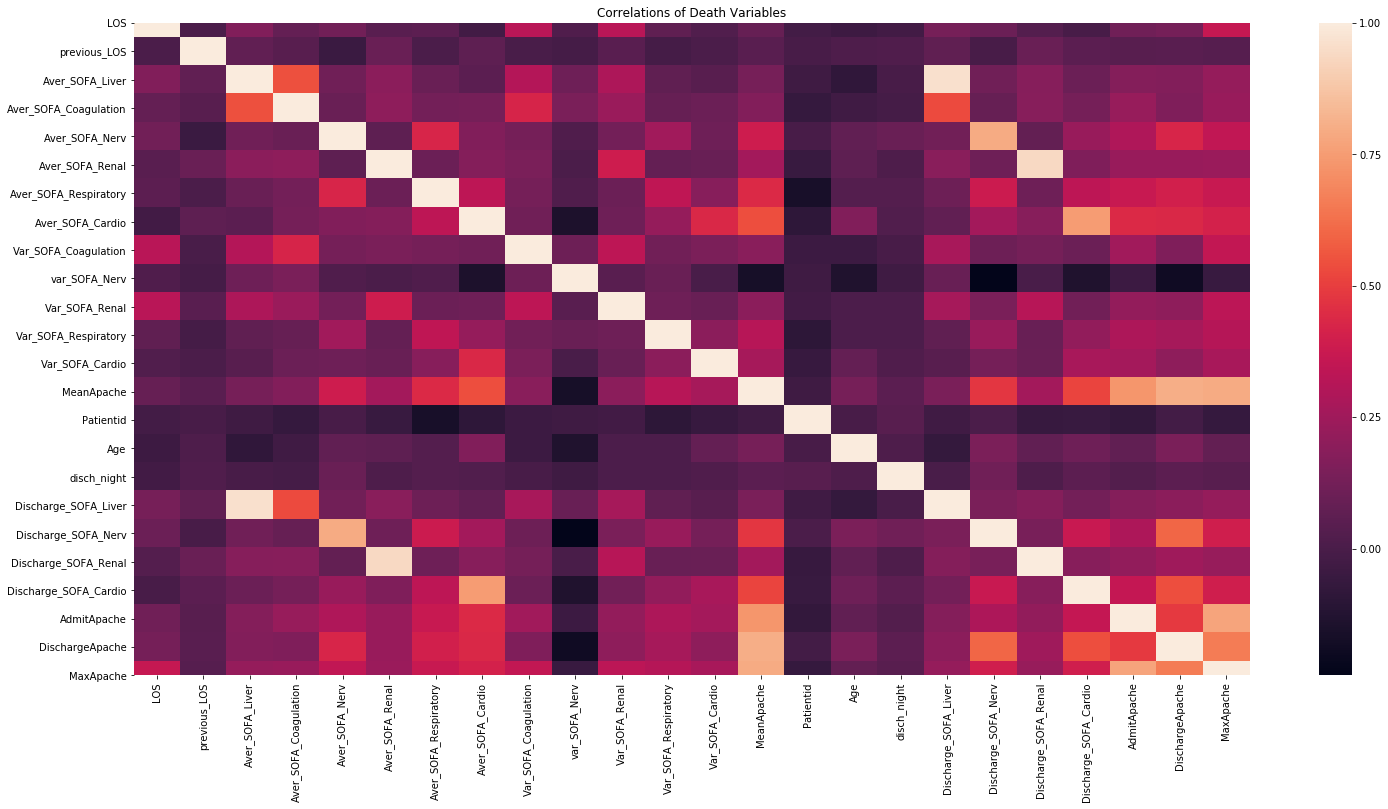

In [159]:
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(x_train_d.corr(), ax=ax)
plt.title('Correlations of Death Variables')
plt.show()

In [162]:
x_train_d.corr()

,LOS,previous_LOS,Aver_SOFA_Liver,Aver_SOFA_Coagulation,Aver_SOFA_Nerv,Aver_SOFA_Renal,Aver_SOFA_Respiratory,Aver_SOFA_Cardio,Var_SOFA_Coagulation,var_SOFA_Nerv,...,Patientid,Age,disch_night,Discharge_SOFA_Liver,Discharge_SOFA_Nerv,Discharge_SOFA_Renal,Discharge_SOFA_Cardio,AdmitApache,DischargeApache,MaxApache
LOS,1.000000,0.004944,0.164794,0.082253,0.119109,0.048850,0.056134,-0.027034,0.325945,0.019820,...,-0.022629,-0.042347,-0.025070,0.133588,0.102299,0.033127,-0.003993,0.113502,0.131102,0.364257
previous_LOS,0.004944,1.000000,0.071870,0.042052,-0.051636,0.097669,0.005223,0.061270,0.000746,-0.017942,...,-0.003916,0.011339,0.016065,0.066013,-0.006989,0.094109,0.054159,0.043292,0.047601,0.035705
Aver_SOFA_Liver,0.164794,0.071870,1.000000,0.545990,0.112986,0.193274,0.095393,0.054555,0.308263,0.110666,...,-0.033356,-0.083634,-0.008163,0.962474,0.115805,0.178497,0.100320,0.173114,0.166391,0.221824
Aver_SOFA_Coagulation,0.082253,0.042052,0.545990,1.000000,0.097578,0.204069,0.126656,0.130404,0.420494,0.141960,...,-0.063920,-0.030844,-0.017551,0.534382,0.087924,0.183356,0.130930,0.227146,0.160918,0.229116
Aver_SOFA_Nerv,0.119109,-0.051636,0.112986,0.097578,1.000000,0.062373,0.426737,0.162974,0.131149,0.017895,...,-0.005955,0.071950,0.093608,0.120110,0.794925,0.074376,0.231069,0.292342,0.424166,0.347403
Aver_SOFA_Renal,0.048850,0.097669,0.193274,0.204069,0.062373,1.000000,0.100830,0.172673,0.145719,0.002703,...,-0.052463,0.064122,0.012080,0.185531,0.109072,0.937406,0.158621,0.233853,0.229207,0.234904
Aver_SOFA_Respiratory,0.056134,0.005223,0.095393,0.126656,0.426737,0.100830,1.000000,0.339643,0.131638,0.016282,...,-0.162516,0.031148,0.033012,0.104720,0.379693,0.111311,0.337077,0.368695,0.401049,0.367458
Aver_SOFA_Cardio,-0.027034,0.061270,0.054555,0.130404,0.162974,0.172673,0.339643,1.000000,0.113661,-0.145638,...,-0.086538,0.165704,0.024267,0.070481,0.260576,0.181314,0.750557,0.440328,0.434358,0.410751
Var_SOFA_Coagulation,0.325945,0.000746,0.308263,0.420494,0.131149,0.145719,0.131638,0.113661,1.000000,0.106103,...,-0.044762,-0.044517,-0.007164,0.276919,0.103681,0.128004,0.101096,0.255854,0.160283,0.353366
var_SOFA_Nerv,0.019820,-0.017942,0.110666,0.141960,0.017895,0.002703,0.016282,-0.145638,0.106103,1.000000,...,-0.034049,-0.136419,-0.035327,0.093003,-0.241193,-0.003165,-0.139158,-0.043935,-0.191549,-0.055991


## Training the Models

#### A) DECISION TREE CLASSIFIER

#### I) Readmission

In [165]:
parameters = [{"max_depth" : [None,1, 5, 10,],
               "min_samples_split" :[0.01, 0.05, 0.1, 0.3],
               "max_features": ["auto", "sqrt", "log2"],
               "max_leaf_nodes": [10, 50, 100, 250]}]


dec_tree = DecisionTreeClassifier(random_state=0)

dec_tree_grid = GridSearchCV(estimator = dec_tree, param_grid= parameters, cv=5,scoring='recall')

dec_tree_grid_fit = dec_tree_grid.fit(x_train_r, y_train_readmitted)

In [166]:
dec_tree_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 250,
 'min_samples_split': 0.01}

In [167]:
dec_tree_grid.best_score_

0.12618605273226216

#### II) Death

In [171]:
parameters = [{"max_depth" : [None,1, 5, 10,],
               "min_samples_split" :[0.01, 0.05, 0.1, 0.3],
               "max_features": ["auto", "sqrt", "log2"],
               "max_leaf_nodes": [10, 50, 100, 250]}]


dec_tree = DecisionTreeClassifier(random_state=0)

dec_tree_grid = GridSearchCV(estimator = dec_tree, param_grid= parameters, cv=5,scoring='recall')

dec_tree_grid_fit = dec_tree_grid.fit(x_train_d, y_train_death)

In [174]:
dec_tree_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'min_samples_split': 0.01}

In [175]:
dec_tree_grid.best_score_

0.6453504903769542

#### B) RANDOM FOREST CLASSIFIER

#### I) Readmission

In [178]:
ran_tree = RandomForestClassifier()

ran_tree_cv = cross_val_score(ran_tree,x_train_r,y_train_readmitted, cv=5,scoring='recall')

ran_tree_cv.mean()

0.0708229426433915

#### II) Death

In [183]:
ran_tree = RandomForestClassifier()

ran_tree_cv = cross_val_score(ran_tree,x_train_d,y_train_death, cv=5,scoring='recall')

ran_tree_cv.mean()

0.6397065121653617

#### C) LOGISTIC REGRESSION

#### I) Readmission

In [194]:
parameters ={"C":np.logspace(-3,3,7),
             "penalty":["l1","l2"]}

log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg,parameters,cv=5,scoring ="recall")
log_reg_grid_fit = log_reg_grid.fit(x_train_r,y_train_readmitted)

In [195]:
log_reg_grid.best_params_

{'C': 10.0, 'penalty': 'l1'}

In [196]:
log_reg_grid.best_score_

0.05386529783581833

#### II) Death

In [197]:
parameters ={"C":np.logspace(-3,3,7),
             "penalty":["l1","l2"]}

log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg,parameters,cv=5,scoring ="recall")
log_reg_grid_fit = log_reg_grid.fit(x_train_d,y_train_death)

In [198]:
log_reg_grid.best_params_

{'C': 10.0, 'penalty': 'l1'}

In [199]:
log_reg_grid.best_score_

0.6622388415345537

#### D) ADABOOST WITH DECISION TREE 

#### I) Readmission

In [209]:
ada_b = AdaBoostClassifier(DecisionTreeClassifier(max_depth= None,max_features = 'auto', 
                                                  max_leaf_nodes = 250,min_samples_split= 0.01))

ada_b_cv = cross_val_score(ada_b,x_train_r,y_train_readmitted,cv=5,scoring="recall")

ada_b_cv.mean()

0.20199501246882795

#### II) Death

In [215]:
ada_b = AdaBoostClassifier(DecisionTreeClassifier(max_depth= None,max_features = 'auto', 
                                                  max_leaf_nodes = 50,min_samples_split= 0.01))

ada_b_cv = cross_val_score(ada_b,x_train_d,y_train_death,cv=5,scoring="recall")

ada_b_cv.mean()

0.6489475002626198

#### E) MULTI-LAYER PERCEPTRON

#### I) Readmission

In [227]:
parameters = {'max_iter': [200,400],
              'alpha': [0.0001,0.001], 
              'hidden_layer_sizes':[100,200,300]}

mlp = MLPClassifier(random_state = 0)
              
mlp_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1 ,cv=5,scoring ="recall")

mlp_grid_fit = mlp_grid.fit(x_train_r,y_train_readmitted)

In [230]:
mlp_grid.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': 200, 'max_iter': 200}

In [232]:
mlp_grid.best_score_

0.4025089451975262

#### II) Death

In [237]:
parameters = {'max_iter': [200,400],
              'alpha': [0.0001,0.001], 
              'hidden_layer_sizes':[100,200,300]}

mlp = MLPClassifier(random_state = 0)
              
mlp_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1 ,cv=5,scoring ="recall")

mlp_grid_fit = mlp_grid.fit( x_train_d , y_train_death )

In [239]:
mlp_grid_fit.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': 100, 'max_iter': 200}

In [313]:
mlp_grid_fit.best_score_

0.6529287088835775

#### E) XGBOOSTING CLASSIFIER 

#### I) Readmission

In [254]:
param = {'max_depth': 1, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 5, 'eval_metric':'recall' }

xgb = XGBClassifier(param=param)

xgb_cv = cross_val_score(xgb,x_train_r,y_train_readmitted,cv=5,scoring="recall").mean()

xgb_cv

0.08179551122194513

#### II) Death

In [253]:
param = {'max_depth': 1, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 5, 'eval_metric':'recall' }

xgb = XGBClassifier(param=param)

xgb_cv = cross_val_score(xgb , x_train_d , y_train_death , cv=5 , scoring="recall" ).mean()

xgb_cv

0.6843446219485588

## Testing The Models

#### A) DECISION TREE CLASSIFIER

#### Readmission

In [262]:
dec_tree_r = DecisionTreeClassifier(max_depth= None,max_features = 'auto',
                                  max_leaf_nodes = 250,min_samples_split = 0.01)

dec_tree_r_fit = dec_tree_r.fit(x_train_r,y_train_readmitted)
dec_tree_r_pred = dec_tree_r_fit.predict(x_test_r)

In [263]:
confusion_matrix(dec_tree_r_pred,y_test_readmitted)

array([[2686,  429],
       [  56,   41]], dtype=int64)

In [266]:
recall_score(dec_tree_r_pred,y_test_readmitted)

0.422680412371134

#### Death

In [269]:
dec_tree_d = DecisionTreeClassifier(max_depth = None,max_features = 'auto', 
                                    max_leaf_nodes = 50,min_samples_split = 0.01)

dec_tree_d_fit = dec_tree_d.fit(x_train_d,y_train_death)
dec_tree_d_pred = dec_tree_d_fit.predict(x_test_d)

In [270]:
confusion_matrix(dec_tree_d_pred,y_test_death)

array([[2494,  234],
       [ 122,  362]], dtype=int64)

In [271]:
recall_score(dec_tree_d_pred,y_test_death)

0.7479338842975206

#### B) RANDOM FOREST CLASSIFIER

#### Readmission

In [273]:
ran_for = RandomForestClassifier()

ran_for_fit = ran_for.fit(x_train_r,y_train_readmitted)

ran_for_pred = ran_for_fit.predict(x_test_r)

In [274]:
confusion_matrix(ran_for_pred,y_test_readmitted)

array([[2685,  434],
       [  57,   36]], dtype=int64)

In [276]:
recall_score(ran_for_pred,y_test_readmitted)

0.3870967741935484

#### Death 

In [277]:
ran_for = RandomForestClassifier()

ran_for_fit = ran_for.fit(x_train_d,y_train_death)

ran_for_pred = ran_for_fit.predict(x_test_d)

In [278]:
confusion_matrix(ran_for_pred,y_test_death)

array([[2534,  225],
       [  82,  371]], dtype=int64)

In [279]:
recall_score(ran_for_pred,y_test_death)

0.8189845474613686

#### C) LOGISTIC REGRESSION

#### Readmission

In [280]:
log_reg_r = LogisticRegression(C = 10.0, penalty= 'l1')

log_reg_r_fit = log_reg_r.fit(x_train_r,y_train_readmitted)

log_reg_r_pred = log_reg_r_fit.predict(x_test_r)

In [281]:
confusion_matrix(log_reg_r_pred,y_test_readmitted)

array([[2716,  445],
       [  26,   25]], dtype=int64)

In [282]:
recall_score(log_reg_r_pred,y_test_readmitted)

0.49019607843137253

#### Death

In [283]:
log_reg_d = LogisticRegression(C = 10.0, penalty= 'l1')

log_reg_d_fit = log_reg_d.fit(x_train_d,y_train_death)

log_reg_d_pred = log_reg_d_fit.predict(x_test_d)

In [284]:
confusion_matrix(log_reg_d_pred,y_test_death)

array([[2534,  196],
       [  82,  400]], dtype=int64)

In [285]:
recall_score(log_reg_d_pred,y_test_death)

0.8298755186721992

#### D) ADABOOST WITH DECISION TREE 

In [287]:
ada_b_r = AdaBoostClassifier(DecisionTreeClassifier(max_depth= None,max_features = 'auto',
                                          max_leaf_nodes = 250,min_samples_split= 0.01))
 
ada_b_r_fit = ada_b_r.fit(x_train_r,y_train_readmitted)

ada_b_r_pred = ada_b_r_fit.predict(x_test_r)

In [288]:
confusion_matrix(ada_b_r_pred,y_test_readmitted)

array([[2505,  372],
       [ 237,   98]], dtype=int64)

In [289]:
recall_score(ada_b_r_pred,y_test_readmitted)

0.29253731343283584

#### Death

In [293]:
ada_b_d = AdaBoostClassifier(DecisionTreeClassifier(max_depth= None,max_features = 'auto', 
                                                  max_leaf_nodes = 50,min_samples_split= 0.01))

ada_b_d_fit = ada_b_d.fit(x_train_d,y_train_death)

ada_b_d_pred = ada_b_d_fit.predict(x_test_d)

In [294]:
confusion_matrix(ada_b_d_pred,y_test_death)

array([[2490,  201],
       [ 126,  395]], dtype=int64)

In [295]:
recall_score(ada_b_d_pred,y_test_death)

0.7581573896353166

#### E) MULTI-LAYER PERCEPTRON

#### Readmission

In [297]:
mlp_r = MLPClassifier(random_state = 0,alpha = 0.0001,
                    hidden_layer_sizes= 200, max_iter= 200)

mlp_r_fit = mlp_r.fit(x_train_r,y_train_readmitted)

mlp_r_pred = mlp_r_fit.predict(x_test_r)

In [298]:
confusion_matrix(mlp_r_pred,y_test_readmitted)

array([[2741,  470],
       [   1,    0]], dtype=int64)

In [299]:
recall_score(mlp_r_pred,y_test_readmitted)

0.0

####  Death

In [302]:
mlp_d = MLPClassifier(random_state = 0,alpha = 0.0001, hidden_layer_sizes = 100, max_iter= 200)

mlp_d_fit= mlp_d.fit(x_train_d,y_train_death)

mlp_d_pred = mlp_d_fit.predict(x_test_d)

In [303]:
confusion_matrix(mlp_d_pred,y_test_death)

array([[2231,  158],
       [ 385,  438]], dtype=int64)

In [304]:
recall_score(mlp_d_pred,y_test_death)

0.5321992709599028

#### E) XGBOOSTING CLASSIFIER 


#### Readmission

In [307]:
param = {'max_depth': 1, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 5, 'eval_metric':'recall' }

xgb_r = XGBClassifier(param=param) 

xgb_r_fit = xgb_r.fit(x_train_r,y_train_readmitted)

xgb_r_pred = xgb_r_fit.predict(x_test_r)

In [308]:
confusion_matrix(xgb_r_pred,y_test_readmitted)

array([[2719,  433],
       [  23,   37]], dtype=int64)

In [309]:
recall_score(xgb_r_pred,y_test_readmitted)

0.6166666666666667

####  Death

In [310]:
param = {'max_depth': 1, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 5, 'eval_metric':'recall' }

xgb_d = XGBClassifier(param=param) 

xgb_d_fit = xgb_r.fit(x_train_d,y_train_death)

xgb_d_pred = xgb_d_fit.predict(x_test_d)

In [311]:
confusion_matrix(xgb_d_pred,y_test_death)

array([[2542,  200],
       [  74,  396]], dtype=int64)

In [312]:
recall_score(xgb_d_pred,y_test_death)

0.8425531914893617